In [2]:
from pandas_datareader import data

An `electronic image` that shows words used in a particular piece of electronic text or series of texts. The words are `different sizes according to how often they are used in the text`

In [9]:
from datetime import datetime
df = data.get_data_yahoo('AAPL','2015-01-01',datetime.today())

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2020-11-23', '2020-11-24', '2020-11-25', '2020-11-27',
               '2020-11-30', '2020-12-01', '2020-12-02', '2020-12-03',
               '2020-12-04', '2020-12-07'],
              dtype='datetime64[ns]', name='Date', length=1494, freq=None)

In [12]:
help(data.get_quote_yahoo)

Help on function get_quote_yahoo in module pandas_datareader.data:

get_quote_yahoo(*args, **kwargs)



In [58]:
stock__.columns

Index(['language', 'region', 'quoteType', 'quoteSourceName', 'triggerable',
       'currency', 'postMarketPrice', 'postMarketChange',
       'regularMarketChange', 'regularMarketChangePercent',
       'regularMarketTime', 'regularMarketPrice', 'regularMarketDayHigh',
       'regularMarketDayRange', 'regularMarketDayLow', 'regularMarketVolume',
       'regularMarketPreviousClose', 'bid', 'ask', 'bidSize', 'askSize',
       'fullExchangeName', 'financialCurrency', 'regularMarketOpen',
       'averageDailyVolume3Month', 'averageDailyVolume10Day',
       'fiftyTwoWeekLowChange', 'fiftyTwoWeekLowChangePercent',
       'fiftyTwoWeekRange', 'fiftyTwoWeekHighChange',
       'fiftyTwoWeekHighChangePercent', 'fiftyTwoWeekLow', 'fiftyTwoWeekHigh',
       'dividendDate', 'earningsTimestamp', 'earningsTimestampStart',
       'earningsTimestampEnd', 'trailingAnnualDividendRate', 'trailingPE',
       'trailingAnnualDividendYield', 'epsTrailingTwelveMonths', 'epsForward',
       'epsCurrentYear', 'pri

In [74]:
stock__.fiftyTwoWeekLow.values[0]

53.1525

In [10]:
import pandas as pd
def load_watchlist():
    watchlist = pd.DataFrame({"Ticker":[]})
    return watchlist

In [11]:
watchlist = load_watchlist()

In [18]:
def append_df(string:str):
    global watchlist
    df = pd.DataFrame({"Ticker":[string]})
    watchlist = watchlist.append(df, ignore_index=True)
    return watchlist

In [19]:
print(append_df('AAPL'))

  Ticker
0   AAPL


In [20]:
print(append_df('MSFT'))

  Ticker
0   AAPL
1   MSFT


In [21]:
print(append_df('LTHM'))

  Ticker
0   AAPL
1   MSFT
2   LTHM


In [6]:
# import numpy as np
# stocks_ = np.array(stocks)
# print(len(stocks_))


In [186]:
# for stock in stocks_:
#     print(stock[0])
tickers = list(stocks.Ticker)

In [187]:
my_columns = ["Tickers", "Stock Price", "Market Capitalization", "Number of Shares to Buy"]
final_dataframe = pd.DataFrame(columns = my_columns)
final_dataframe

,Tickers,Stock Price,Market Capitalization,Number of Shares to Buy


In [34]:
for stock in stocks['Ticker']:
    stock_data = data.get_quote_yahoo(stock)
    final_dataframe = final_dataframe.append(
        pd.Series(
        [
            stock,
            stock_data.regularMarketPrice.values[0],
            stock_data.marketCap.values[0],
            "N/A"
        ],
        index = my_columns), 
        ignore_index = True
    )

In [37]:
final_dataframe.head()

,Tickers,Stock Price,Market Capitalization,Number of Shares to Buy
0,AAPL,122.25,2078470045696,N/A
1,MSFT,214.36,1620668841984,N/A
2,AMZN,3162.58,1586827755520,N/A
3,FB,279.70,796666757120,N/A
4,GOOGL,1823.76,1235033784320,N/A


In [51]:
portfolio_size = input("Enter the value of your portfolio:")
try:
    val = float(portfolio_size) 
except ValueError:
    print("That's not a number! \nPlease try again: ")
    portfolio_size = input("Enter the value of your portfolio:")
    val = float(portfolio_size) 

Enter the value of your portfolio: 1000000


In [52]:
import math
position_size = val/len(final_dataframe.index)
for i in range(0,len(final_dataframe.index)):
    final_dataframe.loc[i,"Number of Shares to Buy"] = \
    math.floor(position_size/final_dataframe.loc[i,"Stock Price"])

In [53]:
final_dataframe.head()

,Tickers,Stock Price,Market Capitalization,Number of Shares to Buy
0,AAPL,122.25,2078470045696,16
1,MSFT,214.36,1620668841984,9
2,AMZN,3162.58,1586827755520,0
3,FB,279.70,796666757120,7
4,GOOGL,1823.76,1235033784320,1


In [ ]:
final_dataframe.to_csv("")

In [41]:
import requests
from scipy import stats
import pandas as pd
stocks = pd.read_csv("canada_tickers.csv")

In [13]:
IEX_CLOUD_API_TOKEN = 'Tpk_621626e278f34ee9b6a58f1441efca27' 

In [50]:
symbol = 'AAPL'
app_url = f'https://sandbox.iexapis.com/stable/stock/{symbol}/quote?token={IEX_CLOUD_API_TOKEN}'
data = requests.get(app_url).json()
print(data)

{'symbol': 'AAPL', 'companyName': 'Apple Inc', 'primaryExchange': 'MSROANSE D ASA/L)BCG GKTANE(ELQLT', 'calculationPrice': 'close', 'open': 127.35, 'openTime': 1645454364640, 'openSource': 'olacfiif', 'close': 127.31, 'closeTime': 1673244304770, 'closeSource': 'clfifaoi', 'high': 128.347, 'highTime': 1662983474531, 'highSource': 'm ii telea15 enpduedcyr', 'low': 124.31, 'lowTime': 1680050076767, 'lowSource': 'dia y5lm 1ctunrdieeee p', 'latestPrice': 125.97, 'latestSource': 'Close', 'latestTime': 'December 4, 2020', 'latestUpdate': 1621563420067, 'latestVolume': 82063955, 'iexRealtimePrice': None, 'iexRealtimeSize': None, 'iexLastUpdated': None, 'delayedPrice': 123.557, 'delayedPriceTime': 1672972307495, 'oddLotDelayedPrice': 127.2, 'oddLotDelayedPriceTime': 1628621116839, 'extendedPrice': 122.36, 'extendedChange': -0.11, 'extendedChangePercent': -0.0009, 'extendedPriceTime': 1661570827624, 'previousClose': 128.96, 'previousVolume': 82632644, 'change': -0.72, 'changePercent': -0.00572, 

In [51]:
price = data['latestPrice']
pe_ratio = data['peRatio']
price, pe_ratio

(125.97, 39.11)

In [52]:
stocks.columns

Index(['Indices'], dtype='object')

In [53]:
# Function sourced from 
# https://stackoverflow.com/questions/312443/how-do-you-split-a-list-into-evenly-sized-chunks
def chunks(lst, n):
    """Yield successive n-sized chunks from lst."""
    for i in range(0, len(lst), n):
        yield lst[i:i + n]   
        
symbol_groups = list(chunks(stocks['Indices'], 100))
symbol_strings = []
for i in range(0, len(symbol_groups)):
    symbol_strings.append(','.join(symbol_groups[i]))
#     print(symbol_strings[i])

rv_columns = ['Ticker', 
              'Price', 
              'Number of Shares to Buy', 
              'Price-to-Earnings Ratio',
              'PE Percentile',
              'Price-to-Book Ratio',
              'PB Percentile',
              'Price-to-Sales Ratio',
              'PS Percentile',
              'EV/EBITDA',
              'EV/EBITDA Percentile',
              'EV/GP',
              'EV/GP Percentile',
              'RV Score']

In [54]:
import numpy as np
no_data = []
rv_dataframe = pd.DataFrame(columns=rv_columns)

for symbol_string in symbol_strings:
    batch_api_call_url = f'https://sandbox.iexapis.com/stable/stock/market/batch?symbols={symbol_string}&types=quote,advanced-stats&token={IEX_CLOUD_API_TOKEN}'
    data = requests.get(batch_api_call_url).json()
    for symbol in symbol_string.split(','):
        try:
            try:
                latestPrice = data[symbol]['quote']['latestPrice']
            except TypeError:
                latestPrice = np.NaN
            try:
                peRatio = data[symbol]['quote']['peRatio']
            except TypeError:
                peRatio = np.NaN
            try:
                price_to_book = data[symbol]['advanced-stats']['priceToBook']
            except TypeError:
                price_to_book = np.NaN
            try:
                price_to_sales = data[symbol]['advanced-stats']['priceToSales']
            except TypeError:
                price_to_sales = np.NaN
            try:
                enterprise_value = data[symbol]['advanced-stats']['enterpriseValue']
            except TypeError:
                enterprise_value = np.NaN
            try:
                ebitda = data[symbol]['advanced-stats']['EBITDA']
            except TypeError:
                ebitda = np.NaN
            try:
                gross_profit = data[symbol]['advanced-stats']['grossProfit']
            except TypeError:
                gross_profit = np.NaN
            try:
                ev_to_ebitda = enterprise_value/ebitda
            except TypeError:
                ev_to_ebitda = np.NaN

            try:
                ev_to_gross_profit = enterprise_value/gross_profit
            except TypeError:
                ev_to_gross_profit = np.NaN
            rv_dataframe = rv_dataframe.append(
                pd.Series(
                [
                    symbol,
                    latestPrice,
                    'N/A',
                    peRatio,
                    'N/A',
                    price_to_book,
                    'N/A',
                    price_to_sales,
                    'N/A',
                    ev_to_ebitda,
                    'N/A',
                    ev_to_gross_profit,
                    'N/A',
                    'N/A'
                ],
                index = rv_columns),
                ignore_index = True
                )
        except KeyError:
            no_data.append(symbol)
#             enterprise_value = np.NaN
#             ebitda = np.NaN
#             gross_profit = np.NaN
#             ev_to_ebitda = np.NaN
#             ev_to_gross_profit = np.NaN
#             rv_dataframe = rv_dataframe.append(
#                     pd.Series(
#                     [
#                         symbol,
#                         np.NaN,
#                         'N/A',
#                         np.NaN,
#                         'N/A',
#                         np.NaN,
#                         'N/A',
#                         np.NaN,
#                         'N/A',
#                         ev_to_ebitda,
#                         'N/A',
#                         ev_to_gross_profit,
#                         'N/A',
#                         'N/A'
#                     ],
#                     index = rv_columns),
#                     ignore_index = True
#                     )

rv_dataframe

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [26]:
len(no_data)

819

In [27]:
rv_dataframe[rv_dataframe.isnull().any(axis=1)]

,Ticker,Price,Number of Shares to Buy,Price-to-Earnings Ratio,PE Percentile,Price-to-Book Ratio,PB Percentile,Price-to-Sales Ratio,PS Percentile,EV/EBITDA,EV/EBITDA Percentile,EV/GP,EV/GP Percentile,RV Score
2,AACG,1.21,N/A,None,N/A,None,N/A,None,N/A,NaN,N/A,NaN,N/A,N/A
3,AACQ,10.4,N/A,None,N/A,None,N/A,None,N/A,NaN,N/A,NaN,N/A,N/A
4,AACQU,10.6,N/A,None,N/A,None,N/A,None,N/A,NaN,N/A,NaN,N/A,N/A
7,AAMC,23.9723,N/A,None,N/A,None,N/A,None,N/A,NaN,N/A,NaN,N/A,N/A
8,AB,34.76,N/A,None,N/A,None,N/A,None,N/A,NaN,N/A,NaN,N/A,N/A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7278,FCTY,11.55,N/A,None,N/A,NaN,N/A,NaN,N/A,NaN,N/A,NaN,N/A,N/A
7279,TCHC,0.0006,N/A,None,N/A,None,N/A,None,N/A,NaN,N/A,NaN,N/A,N/A
7280,COMS,2.2,N/A,None,N/A,None,N/A,None,N/A,NaN,N/A,NaN,N/A,N/A
7281,TDSC,25.16,N/A,None,N/A,None,N/A,None,N/A,NaN,N/A,NaN,N/A,N/A


In [28]:
for column in ['Price-to-Earnings Ratio','Price-to-Book Ratio','Price-to-Sales Ratio','EV/EBITDA','EV/GP']:
    rv_dataframe[column].fillna(rv_dataframe[column].mean(), inplace=True)

In [33]:
len(rv_dataframe[rv_dataframe.isnull().any(axis=1)].index)

0

In [31]:
rv_dataframe.dropna(axis='index', inplace =True)

In [32]:
rv_dataframe

,Ticker,Price,Number of Shares to Buy,Price-to-Earnings Ratio,PE Percentile,Price-to-Book Ratio,PB Percentile,Price-to-Sales Ratio,PS Percentile,EV/EBITDA,EV/EBITDA Percentile,EV/GP,EV/GP Percentile,RV Score
0,A,119.22,N/A,53.500000,N/A,7.200000,N/A,7.100000,N/A,34.689335,N/A,13.489374,N/A,N/A
1,AA,24.63,N/A,-9.760000,N/A,1.300000,N/A,0.475500,N/A,5.160466,N/A,3.983164,N/A,N/A
2,AACG,1.21,N/A,-153.583535,N/A,5.305982,N/A,48.789729,N/A,-115.354232,N/A,41.254245,N/A,N/A
3,AACQ,10.4,N/A,-153.583535,N/A,5.305982,N/A,48.789729,N/A,-115.354232,N/A,41.254245,N/A,N/A
4,AACQU,10.6,N/A,-153.583535,N/A,5.305982,N/A,48.789729,N/A,-115.354232,N/A,41.254245,N/A,N/A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7280,COMS,2.2,N/A,-153.583535,N/A,5.305982,N/A,48.789729,N/A,-115.354232,N/A,41.254245,N/A,N/A
7281,TDSC,25.16,N/A,-153.583535,N/A,5.305982,N/A,48.789729,N/A,-115.354232,N/A,41.254245,N/A,N/A
7283,EGHT,21.16,N/A,-11.810000,N/A,12.520000,N/A,4.860000,N/A,-18.385167,N/A,9.081165,N/A,N/A
7284,AXP,129.87,N/A,32.000000,N/A,4.600000,N/A,2.560000,N/A,17.719569,N/A,2.921518,N/A,N/A


In [34]:
from scipy.stats import percentileofscore as score
metrics = {
    'Price-to-Earnings Ratio':'PE Percentile',
    'Price-to-Book Ratio':'PB Percentile',
    'Price-to-Sales Ratio':'PS Percentile',
    'EV/EBITDA':'EV/EBITDA Percentile',
    'EV/GP':'EV/GP Percentile'
}
for metric in metrics.keys():
    for row in rv_dataframe.index:
        rv_dataframe.loc[row,metrics[metric]] = score(rv_dataframe[metric],rv_dataframe.loc[row,metric])
        
rv_dataframe

,Ticker,Price,Number of Shares to Buy,Price-to-Earnings Ratio,PE Percentile,Price-to-Book Ratio,PB Percentile,Price-to-Sales Ratio,PS Percentile,EV/EBITDA,EV/EBITDA Percentile,EV/GP,EV/GP Percentile,RV Score
0,A,119.22,N/A,53.500000,94.9048,7.200000,93.5666,7.100000,31.2867,34.689335,95.9926,13.489374,31.5014,N/A
1,AA,24.63,N/A,-9.760000,68.9781,1.300000,11.9007,0.475500,4.95205,5.160466,71.1894,3.983164,15.1853,N/A
2,AACG,1.21,N/A,-153.583535,31.623,5.305982,60.176,48.789729,67.9476,-115.354232,32.1025,41.254245,67.4467,N/A
3,AACQ,10.4,N/A,-153.583535,31.623,5.305982,60.176,48.789729,67.9476,-115.354232,32.1025,41.254245,67.4467,N/A
4,AACQU,10.6,N/A,-153.583535,31.623,5.305982,60.176,48.789729,67.9476,-115.354232,32.1025,41.254245,67.4467,N/A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7280,COMS,2.2,N/A,-153.583535,31.623,5.305982,60.176,48.789729,67.9476,-115.354232,32.1025,41.254245,67.4467,N/A
7281,TDSC,25.16,N/A,-153.583535,31.623,5.305982,60.176,48.789729,67.9476,-115.354232,32.1025,41.254245,67.4467,N/A
7283,EGHT,21.16,N/A,-11.810000,68.3126,12.520000,96.565,4.860000,28.2382,-18.385167,65.3499,9.081165,27.3079,N/A
7284,AXP,129.87,N/A,32.000000,90.5682,4.600000,27.9519,2.560000,20.853,17.719569,88.9509,2.921518,11.0062,N/A


In [35]:
from statistics import mean

for row in rv_dataframe.index:
    value_percentiles = []
    for metric in metrics.keys():
        value_percentiles.append(rv_dataframe.loc[row,metrics[metric]])
    rv_dataframe.loc[row, 'RV Score'] = mean(value_percentiles)
    
rv_dataframe

,Ticker,Price,Number of Shares to Buy,Price-to-Earnings Ratio,PE Percentile,Price-to-Book Ratio,PB Percentile,Price-to-Sales Ratio,PS Percentile,EV/EBITDA,EV/EBITDA Percentile,EV/GP,EV/GP Percentile,RV Score
0,A,119.22,N/A,53.500000,94.9048,7.200000,93.5666,7.100000,31.2867,34.689335,95.9926,13.489374,31.5014,69.4504
1,AA,24.63,N/A,-9.760000,68.9781,1.300000,11.9007,0.475500,4.95205,5.160466,71.1894,3.983164,15.1853,34.4411
2,AACG,1.21,N/A,-153.583535,31.623,5.305982,60.176,48.789729,67.9476,-115.354232,32.1025,41.254245,67.4467,51.8592
3,AACQ,10.4,N/A,-153.583535,31.623,5.305982,60.176,48.789729,67.9476,-115.354232,32.1025,41.254245,67.4467,51.8592
4,AACQU,10.6,N/A,-153.583535,31.623,5.305982,60.176,48.789729,67.9476,-115.354232,32.1025,41.254245,67.4467,51.8592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7280,COMS,2.2,N/A,-153.583535,31.623,5.305982,60.176,48.789729,67.9476,-115.354232,32.1025,41.254245,67.4467,51.8592
7281,TDSC,25.16,N/A,-153.583535,31.623,5.305982,60.176,48.789729,67.9476,-115.354232,32.1025,41.254245,67.4467,51.8592
7283,EGHT,21.16,N/A,-11.810000,68.3126,12.520000,96.565,4.860000,28.2382,-18.385167,65.3499,9.081165,27.3079,57.1547
7284,AXP,129.87,N/A,32.000000,90.5682,4.600000,27.9519,2.560000,20.853,17.719569,88.9509,2.921518,11.0062,47.866


In [36]:
rv_dataframe.sort_values('RV Score', ascending=True,inplace =True)
rv_dataframe = rv_dataframe[:50].set_index('Ticker')

In [37]:
rv_dataframe

,Price,Number of Shares to Buy,Price-to-Earnings Ratio,PE Percentile,Price-to-Book Ratio,PB Percentile,Price-to-Sales Ratio,PS Percentile,EV/EBITDA,EV/EBITDA Percentile,EV/GP,EV/GP Percentile,RV Score
Ticker,,,,,,,,,,,,,
THC,34.81,N/A,-285.51,0.787176,-9.9300,0.844425,0.2072,1.6316,5.784742,71.8334,0.889588,2.80521,15.5804
WMG,30.26,N/A,-32.41,65.1782,-42.4800,0.300558,0.6156,6.25447,-135.031775,0.887362,2.486100,9.17418,16.359
WEYS,17.35,N/A,-35.96,64.8919,0.8916,6.99871,0.7692,7.94332,-267.712417,0.443681,1.841469,6.38328,17.3322
MRLN,12.51,N/A,-22.57,66.0727,0.8144,5.98254,1.0500,10.8702,-1559.681406,0.0715615,1.715696,5.89667,17.7787
TUSK,2.31,N/A,-0.69,74.7889,0.1888,2.54759,0.3533,3.30614,-143.874384,0.815801,4.146681,15.7865,19.449
ABM,39.94,N/A,-592.44,0.343495,1.8700,16.6667,0.4425,4.56562,9.614431,78.1022,0.474617,1.44554,20.2247
PRU,84.25,N/A,-196.82,0.973236,0.5038,3.50651,0.5452,5.49592,19.009172,89.8955,0.534511,1.61729,20.2977
ATRO,13.59,N/A,-3.27,71.9479,1.1100,10.1331,0.5406,5.43867,-283.063620,0.429369,4.409821,16.6881,20.9274
GPMT,10.92,N/A,-11.46,68.3985,0.6504,4.37956,2.4000,20.0086,-302.644265,0.386432,3.132746,11.9937,21.0333


In [38]:
portfolio_size = input("Enter the value of your portfolio:")
try:
    val = float(portfolio_size) 
except ValueError:
    print("That's not a number! \nPlease try again: ")
    portfolio_size = input("Enter the value of your portfolio:")
    val = float(portfolio_size) 

Enter the value of your portfolio: 1000000


In [40]:
import math
position_size = val/len(rv_dataframe.index)
for ticker in rv_dataframe.index:
    rv_dataframe.loc[ticker,"Number of Shares to Buy"] = \
    math.floor(position_size/rv_dataframe.loc[ticker,"Price"])
rv_dataframe

,Price,Number of Shares to Buy,Price-to-Earnings Ratio,PE Percentile,Price-to-Book Ratio,PB Percentile,Price-to-Sales Ratio,PS Percentile,EV/EBITDA,EV/EBITDA Percentile,EV/GP,EV/GP Percentile,RV Score
Ticker,,,,,,,,,,,,,
THC,34.81,574,-285.51,0.787176,-9.9300,0.844425,0.2072,1.6316,5.784742,71.8334,0.889588,2.80521,15.5804
WMG,30.26,660,-32.41,65.1782,-42.4800,0.300558,0.6156,6.25447,-135.031775,0.887362,2.486100,9.17418,16.359
WEYS,17.35,1152,-35.96,64.8919,0.8916,6.99871,0.7692,7.94332,-267.712417,0.443681,1.841469,6.38328,17.3322
MRLN,12.51,1598,-22.57,66.0727,0.8144,5.98254,1.0500,10.8702,-1559.681406,0.0715615,1.715696,5.89667,17.7787
TUSK,2.31,8658,-0.69,74.7889,0.1888,2.54759,0.3533,3.30614,-143.874384,0.815801,4.146681,15.7865,19.449
ABM,39.94,500,-592.44,0.343495,1.8700,16.6667,0.4425,4.56562,9.614431,78.1022,0.474617,1.44554,20.2247
PRU,84.25,237,-196.82,0.973236,0.5038,3.50651,0.5452,5.49592,19.009172,89.8955,0.534511,1.61729,20.2977
ATRO,13.59,1471,-3.27,71.9479,1.1100,10.1331,0.5406,5.43867,-283.063620,0.429369,4.409821,16.6881,20.9274
GPMT,10.92,1831,-11.46,68.3985,0.6504,4.37956,2.4000,20.0086,-302.644265,0.386432,3.132746,11.9937,21.0333


In [344]:
rv_1 = rv_dataframe
rv_2 = rv_dataframe
rv_3 = rv_dataframe
rv_4 = rv_dataframe
rv_5 = rv_dataframe
rv_6 = rv_dataframe

In [359]:
rv_1.columns

Index(['Price', 'Number of Shares to Buy', 'Price-to-Earnings Ratio',
       'PE Percentile', 'Price-to-Book Ratio', 'PB Percentile',
       'Price-to-Sales Ratio', 'PS Percentile', 'EV/EBITDA',
       'EV/EBITDA Percentile', 'EV/GP', 'EV/GP Percentile', 'RV Score'],
      dtype='object')

In [365]:
def color_negative_red(number):
    color = 'red' if number < 0 else 'green'
    return f'color:{color}'

In [414]:
def style_dataframe(df):
    metrics = ['Price-to-Earnings Ratio','Price-to-Book Ratio','Price-to-Sales Ratio','EV/EBITDA','EV/GP']
    for column in df.columns:
        if column == 'Price':
             df = df.style.format({'Price':'${:0.2f}'})
    return df

In [417]:
rv_4 = style_dataframe(rv_4)

In [418]:
rv_4

,Price,Number of Shares to Buy,Price-to-Earnings Ratio,PE Percentile,Price-to-Book Ratio,PB Percentile,Price-to-Sales Ratio,PS Percentile,EV/EBITDA,EV/EBITDA Percentile,EV/GP,EV/GP Percentile,RV Score
Ticker,,,,,,,,,,,,,
UNM,$25.05,7984,,15.0495,,4.55446,,2.9703,,3.16832,,0.39604,5.22772
AIG,$40.69,4915,,10.297,,5.34653,,7.72277,,3.9604,,1.78218,5.82178
AAL,$17.20,11627,,13.8614,,4.35644,,2.77228,,2.57426,,5.54455,5.82178
MET,$50.26,3979,,15.6436,,5.74257,,5.74257,,3.76238,,1.18812,6.41584
HFC,$28.57,7000,,6.33663,,8.11881,,1.58416,,7.52475,,11.6832,7.0495
F,$9.48,21097,,7.32673,,14.2574,,1.18812,,4.55446,,10.6931,7.60396
ALL,$105.04,1904,,15.4455,,15.2475,,6.53465,,2.9703,,1.38614,8.31683
HIG,$48.03,4164,,18.0198,,9.70297,,9.10891,,3.56436,,1.9802,8.47525
BA,$242.14,825,,6.13861,,2.77228,,37.2277,,1.38614,,0.19802,9.54455


In [325]:
rv_dataframe[['Price-to-Earnings Ratio','Price-to-Book Ratio','Price-to-Sales Ratio','EV/EBITDA','EV/GP']] = rv_dataframe[['Price-to-Earnings Ratio','Price-to-Book Ratio','Price-to-Sales Ratio','EV/EBITDA','EV/GP']]\
                .style.applymap(color_negative_red)

In [364]:
rv_1.columns

Index(['Price', 'Number of Shares to Buy', 'Price-to-Earnings Ratio',
       'PE Percentile', 'Price-to-Book Ratio', 'PB Percentile',
       'Price-to-Sales Ratio', 'PS Percentile', 'EV/EBITDA',
       'EV/EBITDA Percentile', 'EV/GP', 'EV/GP Percentile', 'RV Score'],
      dtype='object')

In [400]:
rv_2 = rv_2.style.format(
    {
        'Price':'${:0.2f}' 
    
    }
)

In [401]:
rv_2

,Price,Number of Shares to Buy,Price-to-Earnings Ratio,PE Percentile,Price-to-Book Ratio,PB Percentile,Price-to-Sales Ratio,PS Percentile,EV/EBITDA,EV/EBITDA Percentile,EV/GP,EV/GP Percentile,RV Score
Ticker,,,,,,,,,,,,,
UNM,$25.05,7984,5.42,15.0495,0.4641,4.55446,0.4222,2.9703,2.66309,3.16832,0.413321,0.39604,5.22772
AIG,$40.69,4915,-7.39,10.297,0.565,5.34653,0.7857,7.72277,4.67412,3.9604,0.77556,1.78218,5.82178
AAL,$17.20,11627,-1.17,13.8614,-1.8,4.35644,0.421,2.77228,-6.13803,2.57426,1.36646,5.54455,5.82178
MET,$50.26,3979,8.07,15.6436,0.618,5.74257,0.6854,5.74257,4.57089,3.76238,0.665403,1.18812,6.41584
HFC,$28.57,7000,-29.64,6.33663,0.8795,8.11881,0.3288,1.58416,6.90956,7.52475,2.40711,11.6832,7.0495
F,$9.48,21097,-18.08,7.32673,1.22,14.2574,0.2817,1.18812,4.88343,4.55446,2.16762,10.6931,7.60396
ALL,$105.04,1904,7.58,15.4455,1.27,15.2475,0.716,6.53465,2.33437,2.9703,0.687772,1.38614,8.31683
HIG,$48.03,4164,9.9,18.0198,0.9867,9.70297,0.8389,9.10891,4.21264,3.56436,0.823103,1.9802,8.47525
BA,$242.14,825,-30.37,6.13861,-11.21,2.77228,2.24,37.2277,-32.1967,1.38614,-219.739,0.19802,9.54455


In [411]:
rv_2['Price-to-Earnings Ratio']

TypeError: 'Styler' object is not subscriptable

In [278]:
final_dataframe.sort_values('Price-to-Earnings Ratio', inplace=True)
final_dataframe = final_dataframe[final_dataframe['Price-to-Earnings Ratio']>0]
final_dataframe = final_dataframe[:50].set_index("Ticker")
final_dataframe

,Price,Price-to-Earnings Ratio,Number of Shares to Buy
Ticker,,,
NRG,35.400,2.17,N/A
NLOK,20.180,3.7,N/A
BIO,566.100,4.99,N/A
UNM,24.720,5.25,N/A
KIM,15.640,7.02,N/A
ALL,106.780,7.44,N/A
MET,49.700,8,N/A
EBAY,53.440,8.1,N/A
BIIB,249.370,8.27,N/A


Enter the value of your portfolio: 10000000


In [280]:
import math
position_size = val/len(final_dataframe.index)
for ticker in final_dataframe.index:
    final_dataframe.loc[ticker,"Number of Shares to Buy"] = \
    math.floor(position_size/final_dataframe.loc[ticker,"Price"])
final_dataframe

,Price,Price-to-Earnings Ratio,Number of Shares to Buy
Ticker,,,
NRG,35.400,2.17,5649
NLOK,20.180,3.7,9910
BIO,566.100,4.99,353
UNM,24.720,5.25,8090
KIM,15.640,7.02,12787
ALL,106.780,7.44,1873
MET,49.700,8,4024
EBAY,53.440,8.1,3742
BIIB,249.370,8.27,802


In [225]:
data['year1ChangePercent']

0.8831519073688208

In [227]:
final_dataframe = pd.DataFrame(columns=my_columns)
for symbol_string in symbol_strings[:1]:
    batch_api_call_url = f'https://sandbox.iexapis.com/stable/stock/market/batch?symbols={symbol_string}&types=price,stats&token={IEX_CLOUD_API_TOKEN}'
    data = requests.get(batch_api_call_url).json()
    for symbol in symbol_string.split(','):
        final_dataframe = final_dataframe.append(
            pd.Series(
            [
                symbol,
                data[symbol]['price'],
                data[symbol]['stats']['year1ChangePercent'],
                'N/A'
            ],
            index = my_columns),
                ignore_index=True
        )
final_dataframe

,Ticker,Price,One-Year Price Return,Number of Shares to Buy
0,AAPL,125.38,0.877861,N/A
1,MSFT,217.07,0.449515,N/A
2,AMZN,3171.28,0.854236,N/A
3,FB,286.40,0.404173,N/A
4,GOOGL,1845.47,0.383862,N/A
...,...,...,...,...
95,CL,87.54,0.285928,N/A
96,PLD,101.46,0.111551,N/A
97,FDX,301.14,0.949060,N/A
98,CCI,166.50,0.249783,N/A


In [229]:
final_dataframe.sort_values('One-Year Price Return', ascending=False, inplace=True)
final_dataframe = final_dataframe[:50].set_index("Ticker")

In [230]:
final_dataframe

,Price,One-Year Price Return,Number of Shares to Buy
Ticker,,,
NVDA,561.43,1.641473,N/A
AMD,95.16,1.382969,N/A
PYPL,223.88,1.109151,N/A
QCOM,161.34,0.996794,N/A
LRCX,501.96,0.968418,N/A
NOW,534.70,0.957771,N/A
FDX,301.14,0.949060,N/A
AAPL,125.38,0.877861,N/A
AMZN,3171.28,0.854236,N/A


In [231]:
portfolio_size = input("Enter the value of your portfolio:")
try:
    val = float(portfolio_size) 
except ValueError:
    print("That's not a number! \nPlease try again: ")
    portfolio_size = input("Enter the value of your portfolio:")
    val = float(portfolio_size) 

Enter the value of your portfolio: 10000000


In [233]:
import math
position_size = val/len(final_dataframe.index)
for ticker in final_dataframe.index:
    final_dataframe.loc[ticker,"Number of Shares to Buy"] = \
    math.floor(position_size/final_dataframe.loc[ticker,"Price"])

In [234]:
final_dataframe

,Price,One-Year Price Return,Number of Shares to Buy
Ticker,,,
NVDA,561.43,1.641473,356
AMD,95.16,1.382969,2101
PYPL,223.88,1.109151,893
QCOM,161.34,0.996794,1239
LRCX,501.96,0.968418,398
NOW,534.70,0.957771,374
FDX,301.14,0.949060,664
AAPL,125.38,0.877861,1595
AMZN,3171.28,0.854236,63


In [194]:
final_dataframe = pd.DataFrame(columns = my_columns)
for stock in stocks['Ticker']:
    stock_data = data.get_quote_yahoo(stock)
    final_dataframe = final_dataframe.append(
        pd.Series(
        [
            stock,
            stock_data.regularMarketPrice.values[0],
            stock_data.marketCap.values[0],
            "N/A"
        ],
        index = my_columns), 
        ignore_index = True
    )

AttributeError: 'dict' object has no attribute 'get_quote_yahoo'

In [75]:
 from pandas_datareader.iex.stats import RecordsReader

In [94]:
from pandas_datareader.iex.stats import MonthlySummaryReader
MonthlySummaryReader('AAPL').read()

,0,date
averageDailyVolume,1.08594e+08,201512
averageDailyRoutedVolume,4.18399e+07,201512
averageMarketShare,0.01518,201512
averageOrderSize,517,201512
averageFillSize,279,201512
...,...,...
venueXCHIFirstWaveRate,0.95122,202012
venueXCISFirstWaveRate,0.86022,202012
venueXNGSFirstWaveRate,0.99187,202012
venueXNYSFirstWaveRate,0.96976,202012


In [91]:
from pandas_datareader.iex.deep import Deep as IEXDeep
from pandas_datareader.iex.ref import SymbolsReader
#list of all stocks
data = SymbolsReader().read()

In [90]:
data[data.symbol == 'AC']

,symbol,name,date,isEnabled,type,iexId
46,AC,ASSOCIATED CAPITAL GROUP - A,2020-12-04,True,N/A,10827


In [82]:
IEXDeep('AAPL').read()

{'symbol': 'AAPL',
 'marketPercent': 0,
 'volume': 0,
 'lastSalePrice': 0,
 'lastSaleSize': 0,
 'lastSaleTime': 0,
 'lastUpdated': 0,
 'bids': [],
 'asks': [],
 'systemEvent': {},
 'tradeBreaks': []}

In [92]:
RecordsReader().read()

,volume,symbolsTraded,routedVolume,notional
recordValue,585149555,7363,93515474,3.10196e+10
recordDate,2020-03-18,2020-03-13,2020-03-18,2020-11-09
previousDayValue,257637079,7099,41374805,1.53974e+10
avg30Value,280939576,6876,38156228,1.72811e+10


In [76]:
help(RecordsReader)

Help on class RecordsReader in module pandas_datareader.iex.stats:

class RecordsReader(pandas_datareader.iex.IEX)
 |  Total matched volume information from IEX
 |  
 |  Method resolution order:
 |      RecordsReader
 |      pandas_datareader.iex.IEX
 |      pandas_datareader.base._BaseReader
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, symbols=None, start=None, end=None, retry_count=3, pause=0.1, session=None)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  service
 |      Service endpoint
 |  
 |  ----------------------------------------------------------------------
 |  Methods inherited from pandas_datareader.iex.IEX:
 |  
 |  read(self)
 |      Read data
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors inherited from pandas_datareader.iex.IEX:
 |  
 | 

In [121]:
from pandas_datareader.nasdaq_trader import get_nasdaq_symbols
symbols = get_nasdaq_symbols()
symbols[symbols.index=="MSFT"]

,Nasdaq Traded,Security Name,Listing Exchange,Market Category,ETF,Round Lot Size,Test Issue,Financial Status,CQS Symbol,NASDAQ Symbol,NextShares
Symbol,,,,,,,,,,,
MSFT,True,Microsoft Corporation - Common Stock,Q,Q,False,100.0,False,N,NaN,MSFT,False


In [115]:
symbols.columns

Index(['Nasdaq Traded', 'Security Name', 'Listing Exchange', 'Market Category',
       'ETF', 'Round Lot Size', 'Test Issue', 'Financial Status', 'CQS Symbol',
       'NASDAQ Symbol', 'NextShares'],
      dtype='object')

In [114]:
help(get_nasdaq_symbols)

Help on function get_nasdaq_symbols in module pandas_datareader.nasdaq_trader:

get_nasdaq_symbols(retry_count=3, timeout=30, pause=None)
    Get the list of all available equity symbols from Nasdaq.
    
    Returns
    -------
    nasdaq_tickers : pandas.DataFrame
        DataFrame with company tickers, names, and other properties.



In [125]:
dir(data)

['AVForexReader',
 'AVQuotesReader',
 'AVSectorPerformanceReader',
 'AVTimeSeriesReader',
 'BankOfCanadaReader',
 'DEP_ERROR_MSG',
 'DataReader',
 'EcondbReader',
 'EnigmaReader',
 'EurostatReader',
 'FamaFrenchReader',
 'FredReader',
 'IEXDailyReader',
 'IEXDeep',
 'IEXLasts',
 'IEXTops',
 'ImmediateDeprecationError',
 'MoexReader',
 'NaverDailyReader',
 'OECDReader',
 'Options',
 'QuandlReader',
 'StooqDailyReader',
 'TiingoDailyReader',
 'TiingoIEXHistoricalReader',
 'TiingoQuoteReader',
 'YahooActionReader',
 'YahooDailyReader',
 'YahooDivReader',
 'YahooOptions',
 'YahooQuotesReader',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '__warningregistry__',
 'deprecate_kwarg',
 'get_components_yahoo',
 'get_dailysummary_iex',
 'get_data_alphavantage',
 'get_data_enigma',
 'get_data_famafrench',
 'get_data_fred',
 'get_data_moex',
 'get_data_quandl',
 'get_data_stooq',
 'get_data_tiingo',
 'get_data_yahoo',

In [160]:
summary = data.BankOfCanadaReader('AC')

In [163]:
print(summary)

In [255]:
high_quality_momentum_columns = [
    'Ticker',
    'Price',
    'Number of Shares to Buy',
    'One-Year Price Return',
    'One-Year Return Percentile',
    'Six-Month Price Return',
    'Six-Month Return Percentile',
    'Three-Month Price Return',
    'Three-Month Return Percentile',
    'One-Month Price Return',
    'One-Month Return Percentile',
    'HQM Score'
]

hqm_dataframe = pd.DataFrame(columns = high_quality_momentum_columns)

for symbol_string in symbol_strings:
    batch_api_call_url = f'https://sandbox.iexapis.com/stable/stock/market/batch?symbols={symbol_string}&types=price,stats&token={IEX_CLOUD_API_TOKEN}'
    data = requests.get(batch_api_call_url).json()
    for symbol in symbol_string.split(','):
        hqm_dataframe = hqm_dataframe.append(
            pd.Series(
            [
                symbol,
                data[symbol]['price'],
                'N/A',
                data[symbol]['stats']['year1ChangePercent'],
                'N/A',
                data[symbol]['stats']['month6ChangePercent'],
                'N/A',
                data[symbol]['stats']['month3ChangePercent'],
                'N/A',
                data[symbol]['stats']['month1ChangePercent'],
                'N/A',
                'N/A'
            ],
            index = high_quality_momentum_columns),
            ignore_index=True
        )
hqm_dataframe

,Ticker,Price,Number of Shares to Buy,One-Year Price Return,One-Year Return Percentile,Six-Month Price Return,Six-Month Return Percentile,Three-Month Price Return,Three-Month Return Percentile,One-Month Price Return,One-Month Return Percentile,HQM Score
0,AAPL,126.45,N/A,0.880636,N/A,0.500192,N/A,0.012855,N/A,0.030017,N/A,N/A
1,MSFT,217.95,N/A,0.456214,N/A,0.158165,N/A,0.003220,N/A,-0.038786,N/A,N/A
2,AMZN,3177.55,N/A,0.829821,N/A,0.282681,N/A,-0.040268,N/A,-0.050301,N/A,N/A
3,FB,289.90,N/A,0.403951,N/A,0.221056,N/A,-0.010929,N/A,-0.052549,N/A,N/A
4,GOOGL,1839.89,N/A,0.390913,N/A,0.277030,N/A,0.155839,N/A,0.036035,N/A,N/A
...,...,...,...,...,...,...,...,...,...,...,...,...
500,HFC,29.21,N/A,-0.419048,N/A,-0.201154,N/A,0.284033,N/A,0.556825,N/A,N/A
501,FTI,8.53,N/A,0.000000,N/A,0.000000,N/A,0.000000,N/A,0.000000,N/A,N/A
502,UAA,16.83,N/A,-0.108601,N/A,0.522131,N/A,0.637797,N/A,0.124302,N/A,N/A
503,UA,15.47,N/A,-0.143081,N/A,0.510955,N/A,0.610490,N/A,0.127704,N/A,N/A


In [256]:
from scipy.stats import percentileofscore as score
time_periods = [
    'One-Year',
    'Six-Month',
    'Three-Month',
    'One-Month'
]

for row in hqm_dataframe.index:
    for time_period in time_periods:
        change_col = f'{time_period} Price Return'
        percentile_col = f'{time_period} Return Percentile'
        hqm_dataframe.loc[row,percentile_col] =\
        score(hqm_dataframe[change_col], hqm_dataframe.loc[row,change_col])
hqm_dataframe

,Ticker,Price,Number of Shares to Buy,One-Year Price Return,One-Year Return Percentile,Six-Month Price Return,Six-Month Return Percentile,Three-Month Price Return,Three-Month Return Percentile,One-Month Price Return,One-Month Return Percentile,HQM Score
0,AAPL,126.45,N/A,0.880636,97.0297,0.500192,94.8515,0.012855,18.8119,0.030017,30.8911,N/A
1,MSFT,217.95,N/A,0.456214,87.1287,0.158165,54.6535,0.003220,17.2277,-0.038786,12.0792,N/A
2,AMZN,3177.55,N/A,0.829821,96.4356,0.282681,79.0099,-0.040268,8.11881,-0.050301,9.10891,N/A
3,FB,289.90,N/A,0.403951,82.9703,0.221056,66.3366,-0.010929,14.0594,-0.052549,8.71287,N/A
4,GOOGL,1839.89,N/A,0.390913,82.7723,0.277030,77.6238,0.155839,54.6535,0.036035,33.6634,N/A
...,...,...,...,...,...,...,...,...,...,...,...,...
500,HFC,29.21,N/A,-0.419048,1.58416,-0.201154,0.594059,0.284033,83.5644,0.556825,98.4158,N/A
501,FTI,8.53,N/A,0.000000,32.2772,0.000000,16.8317,0.000000,15.8416,0.000000,21.1881,N/A
502,UAA,16.83,N/A,-0.108601,16.6337,0.522131,95.6436,0.637797,99.4059,0.124302,60.5941,N/A
503,UA,15.47,N/A,-0.143081,14.0594,0.510955,95.0495,0.610490,98.8119,0.127704,62.3762,N/A


In [257]:
from statistics import mean

for row in hqm_dataframe.index:
    momemtum_percentiles = []
    for time_period in time_periods:
        momemtum_percentiles.append(hqm_dataframe.loc[row,f'{time_period} Return Percentile'])
    hqm_dataframe.loc[row, 'HQM Score'] = mean(momemtum_percentiles)
hqm_dataframe

,Ticker,Price,Number of Shares to Buy,One-Year Price Return,One-Year Return Percentile,Six-Month Price Return,Six-Month Return Percentile,Three-Month Price Return,Three-Month Return Percentile,One-Month Price Return,One-Month Return Percentile,HQM Score
0,AAPL,126.45,N/A,0.880636,97.0297,0.500192,94.8515,0.012855,18.8119,0.030017,30.8911,60.396
1,MSFT,217.95,N/A,0.456214,87.1287,0.158165,54.6535,0.003220,17.2277,-0.038786,12.0792,42.7723
2,AMZN,3177.55,N/A,0.829821,96.4356,0.282681,79.0099,-0.040268,8.11881,-0.050301,9.10891,48.1683
3,FB,289.90,N/A,0.403951,82.9703,0.221056,66.3366,-0.010929,14.0594,-0.052549,8.71287,43.0198
4,GOOGL,1839.89,N/A,0.390913,82.7723,0.277030,77.6238,0.155839,54.6535,0.036035,33.6634,62.1782
...,...,...,...,...,...,...,...,...,...,...,...,...
500,HFC,29.21,N/A,-0.419048,1.58416,-0.201154,0.594059,0.284033,83.5644,0.556825,98.4158,46.0396
501,FTI,8.53,N/A,0.000000,32.2772,0.000000,16.8317,0.000000,15.8416,0.000000,21.1881,21.5347
502,UAA,16.83,N/A,-0.108601,16.6337,0.522131,95.6436,0.637797,99.4059,0.124302,60.5941,68.0693
503,UA,15.47,N/A,-0.143081,14.0594,0.510955,95.0495,0.610490,98.8119,0.127704,62.3762,67.5743


In [258]:
hqm_dataframe.sort_values('HQM Score', ascending=False, inplace=True)
hqm_dataframe

,Ticker,Price,Number of Shares to Buy,One-Year Price Return,One-Year Return Percentile,Six-Month Price Return,Six-Month Return Percentile,Three-Month Price Return,Three-Month Return Percentile,One-Month Price Return,One-Month Return Percentile,HQM Score
171,FCX,25.88,N/A,1.236995,99.0099,1.326545,100,0.566490,98.0198,0.347866,91.4851,97.1287
370,ALB,140.73,N/A,1.276583,99.2079,0.679494,97.6238,0.479962,96.8317,0.322648,88.9109,95.6436
99,LRCX,503.24,N/A,0.966759,98.0198,0.683183,97.8218,0.526713,97.6238,0.251620,84.3564,94.4554
317,URI,251.09,N/A,0.628072,93.8614,0.528636,96.0396,0.399233,94.2574,0.314047,88.5149,93.1683
87,MU,76.58,N/A,0.592147,92.8713,0.366552,87.7228,0.600823,98.6139,0.353640,91.8812,92.7723
...,...,...,...,...,...,...,...,...,...,...,...,...
136,NOC,310.56,N/A,-0.093810,18.8119,-0.094609,5.54455,-0.092830,2.17822,0.004182,22.1782,12.1782
343,INCY,86.77,N/A,-0.116348,15.2475,-0.111147,4.15842,-0.081729,3.56436,-0.018199,17.8218,10.198
348,FE,29.54,N/A,-0.390202,2.17822,-0.314981,0.19802,-0.001955,15.0495,-0.015520,18.6139,9.0099
133,BSX,34.72,N/A,-0.207954,8.71287,-0.116964,3.76238,-0.175550,0.19802,-0.022796,15.6436,7.07921


In [259]:
portfolio_size = input("Enter the value of your portfolio:")
try:
    val = float(portfolio_size) 
except ValueError:
    print("That's not a number! \nPlease try again: ")
    portfolio_size = input("Enter the value of your portfolio:")
    val = float(portfolio_size) 

Enter the value of your portfolio: 10000000


In [263]:
position_size = val/len(hqm_dataframe.index)
for ticker in hqm_dataframe.index:
    hqm_dataframe.loc[ticker,"Number of Shares to Buy"] = \
    math.floor(position_size/hqm_dataframe.loc[ticker,"Price"])

In [261]:
hqm_dataframe = hqm_dataframe[:50].set_index('Ticker')

In [264]:
hqm_dataframe

,Price,Number of Shares to Buy,One-Year Price Return,One-Year Return Percentile,Six-Month Price Return,Six-Month Return Percentile,Three-Month Price Return,Three-Month Return Percentile,One-Month Price Return,One-Month Return Percentile,HQM Score
Ticker,,,,,,,,,,,
FCX,25.880,7727,1.236995,99.0099,1.326545,100,0.566490,98.0198,0.347866,91.4851,97.1287
ALB,140.730,1421,1.276583,99.2079,0.679494,97.6238,0.479962,96.8317,0.322648,88.9109,95.6436
LRCX,503.240,397,0.966759,98.0198,0.683183,97.8218,0.526713,97.6238,0.251620,84.3564,94.4554
URI,251.090,796,0.628072,93.8614,0.528636,96.0396,0.399233,94.2574,0.314047,88.5149,93.1683
MU,76.580,2611,0.592147,92.8713,0.366552,87.7228,0.600823,98.6139,0.353640,91.8812,92.7723
AMAT,91.420,2187,0.616111,93.6634,0.493355,94.6535,0.473036,96.6337,0.274225,85.9406,92.7228
TER,117.840,1697,0.885375,97.4257,0.526687,95.8416,0.485049,97.2277,0.170488,72.6733,90.7921
XLNX,151.200,1322,0.684537,95.0495,0.563164,96.8317,0.464501,96.2376,0.146432,67.1287,88.8119
NWS,19.060,10493,0.449532,86.5347,0.460139,93.4653,0.271741,81.9802,0.345414,91.0891,88.2673


In [420]:
import IPython.display

In [421]:
dir(IPython.display)

['Audio',
 'Code',
 'DisplayHandle',
 'DisplayObject',
 'FileLink',
 'FileLinks',
 'GeoJSON',
 'HTML',
 'IFrame',
 'Image',
 'JSON',
 'Javascript',
 'Latex',
 'Markdown',
 'Math',
 'Pretty',
 'ProgressBar',
 'SVG',
 'ScribdDocument',
 'TextDisplayObject',
 'Video',
 'VimeoVideo',
 'YouTubeVideo',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'clear_output',
 'display',
 'display_html',
 'display_javascript',
 'display_jpeg',
 'display_json',
 'display_latex',
 'display_markdown',
 'display_pdf',
 'display_png',
 'display_pretty',
 'display_svg',
 'publish_display_data',
 'set_matplotlib_close',
 'set_matplotlib_formats',
 'update_display']

In [ ]:
import time

# seconds passed since epoch
while True:
    seconds = time.time()
    local_time = time.ctime(seconds)
    display.clear_output(wait = True)
    print("Local time:", local_time)	

Local time: Sun Dec  6 14:43:19 2020


In [ ]:
from IPython import display
import time 
while True:
    display.clear_output(wait=True)
    print (time.strftime("%m/%d/%Y %H:%M"), end="", flush=True)

12/06/2020 14:50

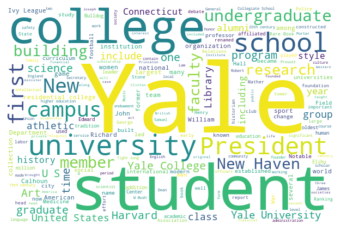

In [13]:
import wikipedia
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

title = wikipedia.search("Yale")[0]
page = wikipedia.page(title)
stopwords = set(STOPWORDS)
wc = WordCloud(background_color = "white", width = 600, height = 400, \
				   max_words =200, stopwords=stopwords).generate(page.content)
fig, ax = plt.subplots(facecolor=None)
plt.imshow(wc,interpolation="bilinear", aspect='equal')
ax.axis("off")
plt.show()

In [1]:
##Optimize Portfolio using the Efficient Frontier

from pandas_datareader import data
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
my_year_month_fmt = mdates.DateFormatter('%m/%y')

In [50]:
#ASSETS
assets = ['AMD', 'CLDR', 'DELL', 'LTHM', 'LYFT', 'PBW', 'PYPL', 'SQ', 'XBC.V']

#WEIGHTS
#weights = np.array([1/9, 1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9])
weights = np.array([0.1070,0.0404,0.2345,0.0049,0.0375,0.1592,0.1062,0.3046,0.0058])

In [51]:
stock_start_date = '2019-10-07'
stock_end_date = datetime.today().strftime('%Y-%m-%d')

In [52]:
###GET ADJUSTED CLOSE PRICE
df = pd.DataFrame()

####STORE ADJUSTD CLOSE PRICE
for stock in assets:
    df[stock] = data.DataReader(stock, data_source='yahoo', start=stock_start_date, end=stock_end_date)['Adj Close']

In [53]:
df

,AMD,CLDR,DELL,LTHM,LYFT,PBW,PYPL,SQ,XBC.V
Date,,,,,,,,,
2019-10-07,28.930000,8.74,50.520000,6.83,39.240002,28.307600,101.620003,62.250000,1.60
2019-10-08,28.230000,8.55,48.810001,6.57,38.660000,28.109854,99.330002,60.799999,1.65
2019-10-09,28.459999,8.56,49.459999,6.45,38.200001,28.149403,99.889999,62.220001,1.65
2019-10-10,28.379999,8.36,49.000000,6.58,37.700001,28.544899,100.540001,62.029999,1.69
2019-10-11,29.750000,8.50,50.299999,6.94,39.485001,28.772308,101.580002,61.540001,1.64
...,...,...,...,...,...,...,...,...,...
2020-11-30,92.660004,11.68,69.029999,15.17,38.169998,91.879997,214.119995,210.960007,5.99
2020-12-01,92.629997,11.33,70.519997,15.50,39.610001,89.870003,216.539993,203.000000,6.01
2020-12-02,93.739998,11.20,70.519997,15.33,43.400002,87.989998,212.559998,202.000000,6.01


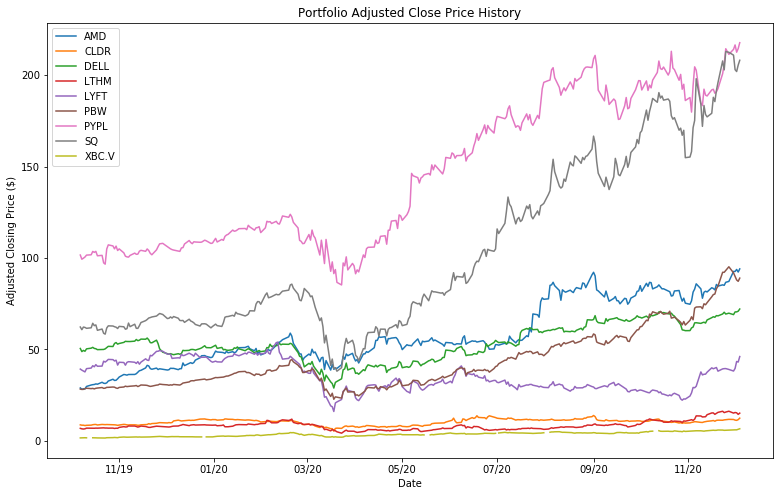

In [54]:
#visually show the stock portfolio
title = 'Portfolio Adjusted Close Price History'
my_stocks = df

###Plot
fig, ax = plt.subplots(figsize=(13,8))
for column in my_stocks.columns.values:
    ax.plot(my_stocks[column], label = column)

ax.set_title(title)
ax.set_xlabel('Date')
ax.set_ylabel('Adjusted Closing Price ($)')
ax.legend(my_stocks.columns.values, loc='best')
ax.xaxis.set_major_formatter(my_year_month_fmt)

In [55]:
###Show the daily simple return
returns = df.pct_change()
returns

,AMD,CLDR,DELL,LTHM,LYFT,PBW,PYPL,SQ,XBC.V
Date,,,,,,,,,
2019-10-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-08,-0.024196,-0.021739,-0.033848,-0.038067,-0.014781,-0.006986,-0.022535,-0.023293,0.031250
2019-10-09,0.008147,0.001170,0.013317,-0.018265,-0.011899,0.001407,0.005638,0.023355,0.000000
2019-10-10,-0.002811,-0.023365,-0.009300,0.020155,-0.013089,0.014050,0.006507,-0.003054,0.024242
2019-10-11,0.048273,0.016746,0.026531,0.054711,0.047347,0.007967,0.010344,-0.007899,-0.029586
...,...,...,...,...,...,...,...,...,...
2020-11-30,0.062737,-0.005957,-0.011315,-0.063002,-0.022285,-0.034874,0.012914,-0.007340,0.022184
2020-12-01,-0.000324,-0.029966,0.021585,0.021753,0.037726,-0.021876,0.011302,-0.037732,0.003339
2020-12-02,0.011983,-0.011474,0.000000,-0.010968,0.095683,-0.020919,-0.018380,-0.004926,0.000000


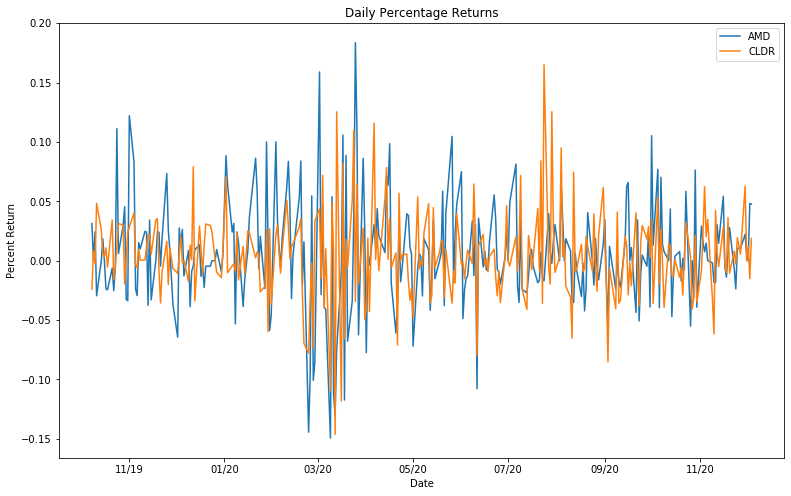

In [70]:
###Plot Daily Returns
my_returns = returns
fig, ax = plt.subplots(figsize=(13,8))
# for column in my_returns.columns.values:
ax.plot(my_returns[['XBC.V', 'AMD']], label = column)

ax.set_title("Daily Percentage Returns")
ax.set_xlabel('Date')
ax.set_ylabel('Percent Return')
ax.legend(my_returns.columns.values, loc='best')
ax.xaxis.set_major_formatter(my_year_month_fmt)

In [56]:
###Annualized Co-Variance matrix
cov_matrix_annual = returns.cov()*252
cov_matrix_annual

,AMD,CLDR,DELL,LTHM,LYFT,PBW,PYPL,SQ,XBC.V
AMD,0.338814,0.153983,0.135089,0.154645,0.155937,0.156923,0.167150,0.214713,0.155012
CLDR,0.153983,0.427489,0.155238,0.132112,0.240524,0.175816,0.160913,0.226805,0.165923
DELL,0.135089,0.155238,0.230734,0.185882,0.199022,0.160163,0.134693,0.153918,0.143880
LTHM,0.154645,0.132112,0.185882,0.685548,0.260469,0.271844,0.147641,0.236563,0.225611
LYFT,0.155937,0.240524,0.199022,0.260469,0.683191,0.230152,0.155852,0.248986,0.156578
PBW,0.156923,0.175816,0.160163,0.271844,0.230152,0.252512,0.144988,0.225078,0.187374
PYPL,0.167150,0.160913,0.134693,0.147641,0.155852,0.144988,0.245426,0.244773,0.116034
SQ,0.214713,0.226805,0.153918,0.236563,0.248986,0.225078,0.244773,0.468364,0.173828
XBC.V,0.155012,0.165923,0.143880,0.225611,0.156578,0.187374,0.116034,0.173828,0.509607


In [57]:
#Calcuate portfolio variance
port_variance = np.dot(weights.T, np.dot(cov_matrix_annual,weights))
port_variance

0.21654803671006448

In [58]:
#calculation portfolio volatility (squareroot of variance)
port_volatility = np.sqrt(port_variance)
port_volatility

0.46534722166363524

In [59]:
#annual portfolio return 
portfolio_simple_annual_return = np.sum(returns.mean()*weights)*252
portfolio_simple_annual_return

0.9247111857758931

In [60]:
#Expected Annual Return, Volatlity (Risk) and Variance

percent_var = str(round(port_variance,2)*100) + '%'
percent_vols = str(round(port_volatility,2)*100) + '%'
percent_ret = str(round(portfolio_simple_annual_return,2)*100) + '%'

print(f'Expected annual return: {percent_ret}')
print(f'Annual volatility / risk: {percent_vols}')
print(f'Annual variance: {percent_var}')

Expected annual return: 92.0%
Annual volatility / risk: 47.0%
Annual variance: 22.0%


In [61]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [62]:
#Portfolio Optimization!

#Calculate Expected Returns and the annualized covariance matrix of asset returns
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)


#Optimize for max sharpe ratio
ef = EfficientFrontier(mu,S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

OrderedDict([('AMD', 0.28242), ('CLDR', 0.0), ('DELL', 0.0), ('LTHM', 0.0), ('LYFT', 0.0), ('PBW', 0.31655), ('PYPL', 0.0), ('SQ', 0.06031), ('XBC.V', 0.34071)])
Expected annual return: 193.8%
Annual volatility: 48.4%
Sharpe Ratio: 3.96


(1.9383731725764848, 0.48430437837546136, 3.9610898811434008)

In [63]:
###Get the discrete allocation of each share per stock
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)
weights = cleaned_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=10000)

allocation, leftover = da.lp_portfolio()
print(f'Discrete allocation: {allocation}')
print('Funds remaining: ${:.2f}'.format(leftover))

Discrete allocation: {'AMD': 30, 'PBW': 35, 'SQ': 3, 'XBC.V': 517}
Funds remaining: $27.15


In [75]:
help(DiscreteAllocation)

Help on class DiscreteAllocation in module pypfopt.discrete_allocation:

class DiscreteAllocation(builtins.object)
 |  Generate a discrete portfolio allocation from continuous weights
 |  
 |  Instance variables:
 |  
 |  - Inputs:
 |  
 |      - ``weights`` - dict
 |      - ``latest_prices`` - pd.Series or dict
 |      - ``total_portfolio_value`` - int/float
 |      - ``short_ratio``- float
 |  
 |  - Output: ``allocation`` - dict
 |  
 |  Public methods:
 |  
 |  - ``greedy_portfolio()`` - uses a greedy algorithm
 |  - ``lp_portfolio()`` - uses linear programming
 |  
 |  Methods defined here:
 |  
 |  __init__(self, weights, latest_prices, total_portfolio_value=10000, short_ratio=0.3)
 |      :param weights: continuous weights generated from the ``efficient_frontier`` module
 |      :type weights: dict
 |      :param latest_prices: the most recent price for each asset
 |      :type latest_prices: pd.Series
 |      :param total_portfolio_value: the desired total value of the portfoli

In [71]:
import math
import pandas_datareader as data
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

In [104]:
df = data.DataReader('AMD','yahoo','1980-01-01', '2020-12-06')

In [105]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1980-03-17,3.302083,3.125000,0.000000,3.145833,219600.0,3.145833
1980-03-18,3.125000,2.937500,0.000000,3.031250,727200.0,3.031250
1980-03-19,3.083333,3.020833,0.000000,3.041667,295200.0,3.041667
1980-03-20,3.062500,3.010417,0.000000,3.010417,159600.0,3.010417
1980-03-21,3.020833,2.906250,0.000000,2.916667,130800.0,2.916667
...,...,...,...,...,...,...
2020-11-30,92.739998,86.529999,87.330002,92.660004,84483000.0,92.660004
2020-12-01,93.900002,90.779999,92.250000,92.629997,58670500.0,92.629997
2020-12-02,96.370003,92.529999,92.889999,93.739998,57988800.0,93.739998


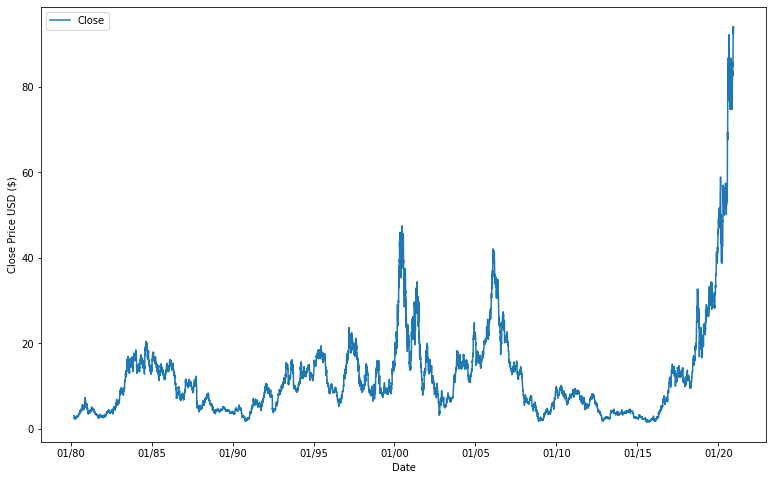

In [106]:
import matplotlib.dates as mdates
my_year_month_fmt = mdates.DateFormatter('%m/%y')
#plot the closing price
fig, ax = plt.subplots(figsize=(13,8))

ax.plot(df['Close'], label= 'Close')
ax.set_xlabel('Date')
ax.set_ylabel('Close Price USD ($)')
ax.legend(loc='best')
ax.xaxis.set_major_formatter(my_year_month_fmt);

In [107]:
###Create a new dataframe 
data = df.filter(['Close'])

####Convert the dataframe to a numpy array
dataset = data.values

###Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset)*.8)

training_data_len

8216

In [108]:
#Scale data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [109]:
#Create the training data set
#create the scaled training data set
train_data = scaled_data[0:training_data_len,:]

#split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

In [110]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [111]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(8156, 60, 1)

In [112]:
model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [113]:
#Complite model
model.compile(optimizer='adam', loss='mean_squared_error')

In [114]:
#Train the model
model.fit(x_train,y_train, batch_size=1, epochs=1)

8156/8156 [==============================] - 200s 24ms/step - loss: 2.0393e-04


In [115]:
#Create testing dataset
#create a new array containing scaled values from index
test_data = scaled_data[training_data_len-60: , :]

#create the data set x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [116]:
#Conver data to a numpy array
x_test = np.array(x_test)

In [117]:
#reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [118]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [119]:
###Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.7749978773433719

c:\users\jeanm\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


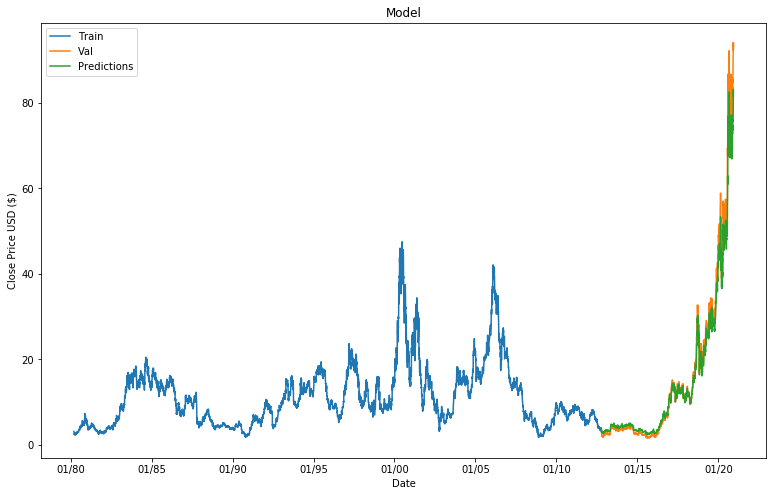

In [120]:
######Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid["Predictions"] = predictions

#visualize the data
fig, ax = plt.subplots(figsize=(13,8))

ax.set_title("Model")
ax.set_xlabel('Date')
ax.set_ylabel('Close Price USD ($)')
ax.plot(train['Close'])
ax.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='best')
ax.xaxis.set_major_formatter(my_year_month_fmt);

In [121]:
#show the valid and the predicted prices
valid

,Close,Predictions
Date,,
2012-10-08,3.190000,3.906472
2012-10-09,3.250000,3.892577
2012-10-10,3.150000,3.924041
2012-10-11,3.200000,3.868871
2012-10-12,2.740000,3.877387
...,...,...
2020-11-30,92.660004,77.645714
2020-12-01,92.629997,82.607727
2020-12-02,93.739998,82.714996


In [123]:
import pandas_datareader as data
stock_quote = data.DataReader('AMD', 'yahoo', '2010-01-01','2020-12-07')

new_df = stock_quote.filter(['Close'])

last_60_days = new_df[-60:].values

#scale data
last_60_days_scaled = scaler.transform(last_60_days)

x_test = []

#append last 60 days
x_test.append(last_60_days_scaled)

x_test = np.array(x_test)

#reshape data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

predicted_price = model.predict(x_test)

##undo the scaling
predicted_price = scaler.inverse_transform(predicted_price)
print(predicted_price)

[[83.082344]]


In [100]:
stock_2 = data.DataReader('SQ','yahoo','2020-12-07','2020-12-07')
print(stock_2['Close'])

Date
2020-12-07    212.580002
Name: Close, dtype: float64
